<p style="font-family: Cambria; text-align: center; font-size: 48px;">II. Descriptive Analysis</p>

In [15]:
#Importing all the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore", UserWarning)

In [23]:
#Reading the file 
data=pd.read_excel("GDM_Python_Aug2025.xlsx")

In [25]:
df=data.copy()

#### 1.How many participants were diagnosed with GDM ('GDM Diagonised'), and what percentage does this represent the dataset ?

In [27]:
yes = df['GDM Diagonised'].eq('Yes').sum()
total = len(df)
print(f"GDM cases: {yes}")
print(f"GDM rate: {yes / total:.2%}")

GDM cases: 74
GDM rate: 13.10%


##### Reasoning: Since the prevalence of Gestational Diabetes Mellitus (GDM) is the primary focus of our analysis. It helps in understanding the distribution of the condition in this specific group.


#### 2.What is the average age of those with and without GDM?

In [60]:
# Step 1: Count GDM diagnosis by age group
counts = df.groupby('Age_gt_30')['GDM Diagonised'].value_counts().unstack()

# Step 2: Convert counts to percentages per age group
percentages = counts.div(counts.sum(axis=1), axis=0).mul(100).round(1)

# Step 3: Rename columns for clarity
percentages.columns = ['Not Recorded (%)', 'Non-GDM (%)', 'GDM (%)']

# Step 4: Display the resul
print(percentages)


           Not Recorded (%)  Non-GDM (%)  GDM (%)
Age_gt_30                                        
No                      2.0         88.2      9.9
Yes                     2.8         82.3     14.9


##### Reasoning: GDM prevalence increases by 5 percentage points in the >30 age group (from 9.9% to 14.9%). Age > 30 is a clear risk factor.



   WeightinV1  Height_cms   BMI
0        59.4       169.6  20.7
1        70.1       154.9  29.2
2        64.9       157.8  26.1
3        67.1       164.7  24.7
4        67.5       169.9  23.4


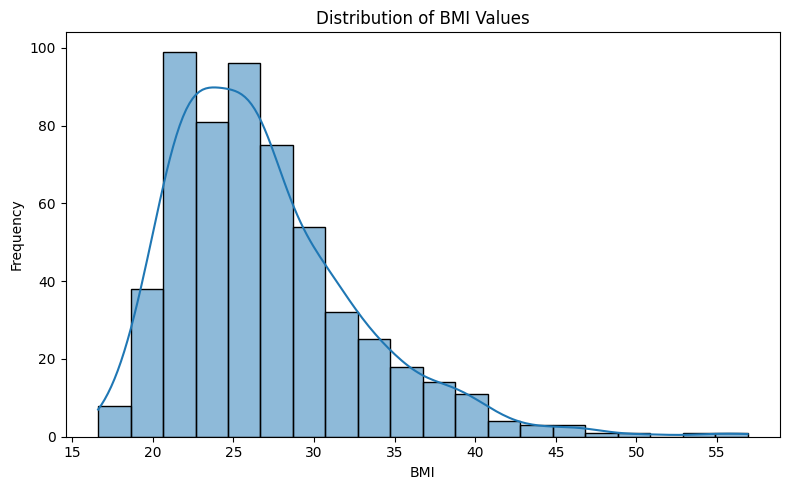

count    565.000000
mean      26.875398
std        5.834346
min       16.600000
25%       22.600000
50%       25.800000
75%       29.900000
max       56.900000
Name: BMI, dtype: float64

In [83]:
# Convert height from cm to meters
df['Height_m'] = df['Height_cms'] / 100
df['BMI'] = df['WeightinV1'] / (df['Height_m'] ** 2)
df['BMI'] = df['BMI'].round(1)
print(df[['WeightinV1', 'Height_cms', 'BMI']].head())
plt.figure(figsize=(8, 5))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('Distribution of BMI Values')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
df['BMI'].describe()

#### 4. Compare participants of age > 30 and age < 30 with  BMI range for both GDM and Non gdm participants? 

In [80]:
# Define BMI categories function 
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMIinV1'].apply(bmi_category)

# Map age and GDM for clarity
df['Age_Group'] = df['Age_gt_30'].map({'No': '<=30', 'Yes': '>30'})
df['GDM_Status'] = df['GDM Diagonised'].map({'No': 'No GDM', 'Yes': 'GDM'})

age_groups = ['<=30', '>30']
gdm_statuses = ['No GDM', 'GDM']

for age in age_groups:
    for gdm in gdm_statuses:
        subset = df[(df['Age_Group'] == age) & (df['GDM_Status'] == gdm)]
        counts = subset['BMI_Category'].value_counts()
        total = counts.sum()
        print(f"\nAge Group: {age}, GDM Status: {gdm}")
        for category, count in counts.items():
            pct = (count / total) * 100 if total > 0 else 0
            print(f"  {category}: {count} ({pct:.1f}%)")
        if total == 0:
            print("  No participants in this group.")



Age Group: <=30, GDM Status: No GDM
  Normal: 78 (43.6%)
  Overweight: 55 (30.7%)
  Obese: 43 (24.0%)
  Underweight: 3 (1.7%)

Age Group: <=30, GDM Status: GDM
  Normal: 10 (50.0%)
  Obese: 6 (30.0%)
  Overweight: 4 (20.0%)

Age Group: >30, GDM Status: No GDM
  Normal: 128 (43.0%)
  Overweight: 105 (35.2%)
  Obese: 63 (21.1%)
  Underweight: 2 (0.7%)

Age Group: >30, GDM Status: GDM
  Obese: 23 (42.6%)
  Overweight: 16 (29.6%)
  Normal: 15 (27.8%)
